### To create multiple clusters by using hierarchical clustering – Agglomerative based on .csv file  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 1: Load dataset from CSV
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# Step 2: Select numerical features for clustering
features = df[['Age', 'Annual Income (k$)']]

In [4]:
# Optional: Scale the features (recommended for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# Step 3: Compute the distance matrix and
# Step 4: Apply linkage method (e.g., Ward's)
linkage_matrix = linkage(scaled_features, method='ward')

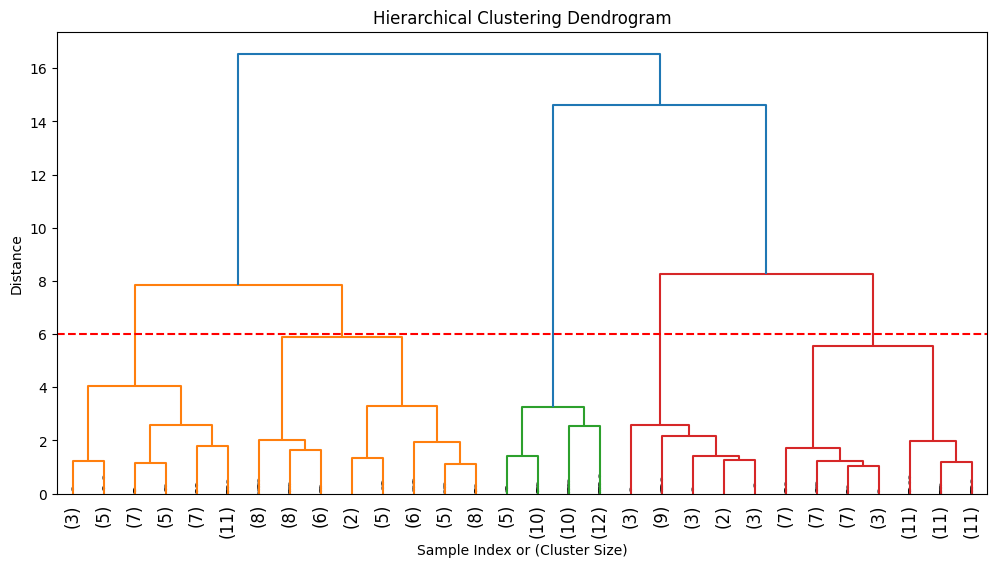

In [6]:
# Step 5: Draw dendrogram to visualize clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.axhline(y=6, color='r', linestyle='--')  # Cutoff line for 3 clusters
plt.show()

In [7]:
# Step 6: Choose number of clusters based on dendrogram
num_clusters = 3
df['Cluster'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [8]:
# Step 7: Display clustered data
print(df[['Age', 'Annual Income (k$)', 'Cluster']].head(10))

   Age  Annual Income (k$)  Cluster
0   19                  15        2
1   21                  15        2
2   20                  16        2
3   23                  16        2
4   31                  17        2
5   22                  17        2
6   35                  18        2
7   23                  18        2
8   64                  19        1
9   30                  19        2


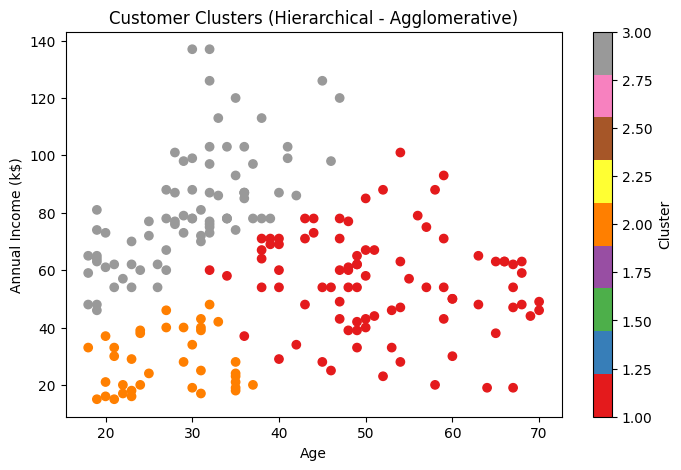

In [9]:
# Step 8: Plot clusters
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='Set1')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Clusters (Hierarchical - Agglomerative)')
plt.colorbar(label='Cluster')
plt.show()